In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [79]:
def norm(x):
    return (x-np.mean(x))/np.std(x)

n_samples=500

t=np.arange(n_samples)
x1=stats.norm.rvs(loc=0,scale=1,size=n_samples)
x2=stats.norm.rvs(loc=0,scale=1,size=n_samples)
x3=stats.norm.rvs(loc=0,scale=1,size=n_samples)
y=x1*x2

Xn=np.stack([norm(x1),norm(x2)],axis=1);

In [80]:
ax

<AxesSubplot:xlabel='$x_2$'>

Text(0.5, 0, '$x_2$')

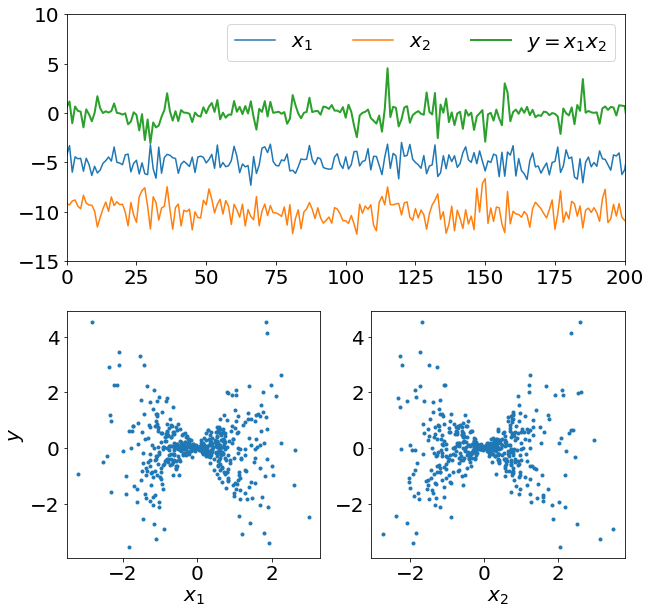

In [99]:
fig=plt.subplots(ncols=2,figsize=[10,10])
ax=plt.subplot(2,1,1)
ax.plot(t,norm(x1)-5,label='$x_1$')
ax.plot(t,norm(x2)-10,label='$x_2$')
ax.plot(t,norm(y),linewidth=2,label='$y=x_1x_2$')

ax.legend(ncol=4)
ax.set_xlim(0,200)
ax.set_ylim(-15,10)

ax=plt.subplot(2,2,3)
ax.plot(x1,norm(y),'.')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$y$')


ax=plt.subplot(2,2,4)
ax.plot(x2,norm(y),'.')
ax.set_xlabel('$x_2$')


TypeError: cannot unpack non-iterable AxesSubplot object

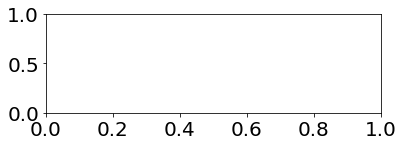

In [34]:
fig,ax=plt.subplot(2,1,1)
ax[0,0].plot(t,norm(x1)-5,label='$x_1$')
ax[0,0].plot(t,norm(x2)-10,label='$x_2$')
ax[0,0].plot(t,norm(y),linewidth=2,label='$y$')
ax[0,0].legend(ncol=4)
ax[0,0].set_xlim(0,200)


ax[0,1].plot(x1,norm(yn),'o')

ax[1,0].plot(x2,norm(yn),'o')


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, yn,test_size=0.2,random_state=1)


In [23]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression().fit(Xn,yn)

yhat_train_0=lin_reg.predict(X_train);
yhat_test_0=lin_reg.predict(X_test);


from sklearn.neural_network import MLPRegressor

model_1 = MLPRegressor(hidden_layer_sizes=5,max_iter=5000)
model_2 = MLPRegressor(hidden_layer_sizes=16,max_iter=5000)
model_3 = MLPRegressor(hidden_layer_sizes=[126],max_iter=5000)


mlp_1=model_1.fit(X_train, y_train)
mlp_2=model_2.fit(X_train, y_train)
mlp_3=model_3.fit(X_train, y_train)

yhat_train_1=mlp_1.predict(X_train);
yhat_train_2=mlp_2.predict(X_train);
yhat_train_3=mlp_3.predict(X_train);


yhat_test_1=mlp_1.predict(X_test);
yhat_test_2=mlp_2.predict(X_test);
yhat_test_3=mlp_3.predict(X_test);



Text(0.5, 1.0, 'ANN 128 hidden layers')

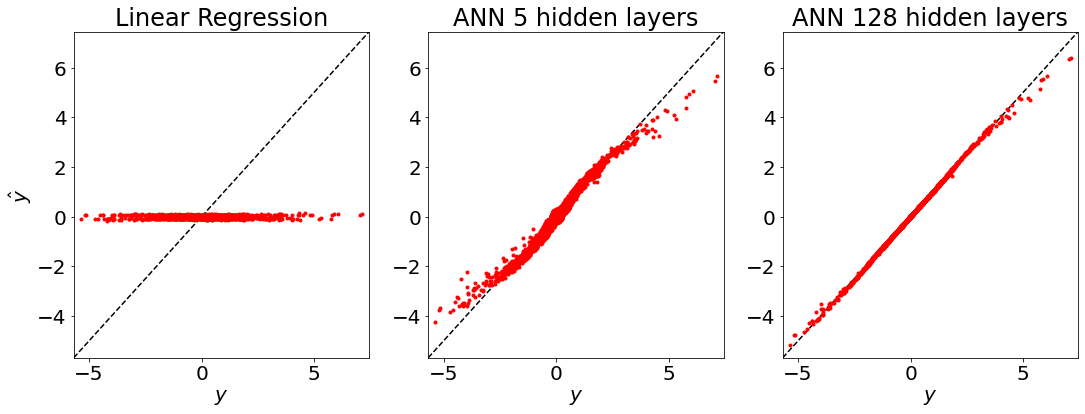

In [97]:
fig,ax=plt.subplots(1,3,figsize=[18,6])


for j in [0,1,2]:
        ax[j].plot([np.min(yn),np.max(yn)],[np.min(yn),np.max(yn)],'k--')
        ax[j].set_xlabel('$y$')
        ax[j].set_xlim(np.min(yn),np.max(yn))
        ax[j].set_ylim(np.min(yn),np.max(yn))

ax[0].set_ylabel('$\hat y$')     


ax[0].plot(y_train,yhat_train_0,'r.')
ax[0].set_title('Linear Regression')

ax[1].plot(y_train,yhat_train_1,'r.')
ax[1].set_title('ANN 5 hidden layers')

ax[2].plot(y_train,yhat_train_3,'r.')
ax[2].set_title('ANN 128 hidden layers')

Text(0.5, 1.0, 'ANN 128 hidden layers')

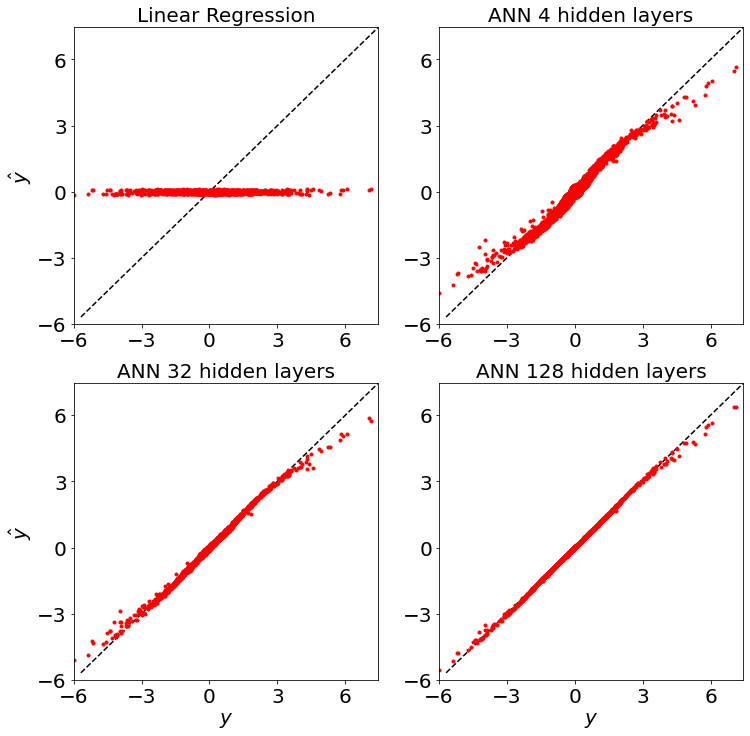

In [116]:
fig,ax=plt.subplots(2,2,figsize=[12,12])

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].plot([np.min(yn),np.max(yn)],[np.min(yn),np.max(yn)],'k--')

        ax[i,j].set_xlim(np.min(yn),np.max(yn))
        ax[i,j].set_ylim(np.min(yn),np.max(yn))
        ax[i,j].set_xticks(np.arange(-6,8,3))
        ax[i,j].set_yticks(np.arange(-6,8,3))

ax[0,0].set_ylabel('$\hat y$')  
ax[1,0].set_ylabel('$\hat y$')  
ax[1,0].set_xlabel('$y$')
ax[1,1].set_xlabel('$y$')

ax[0,0].plot(y_train,yhat_train_0,'r.')
ax[0,1].plot(y_train,yhat_train_1,'r.')
ax[1,0].plot(y_train,yhat_train_2,'r.')
ax[1,1].plot(y_train,yhat_train_3,'r.')

ax[0,0].set_title('Linear Regression',fontsize=20)
ax[0,1].set_title('ANN 4 hidden layers',fontsize=20)
ax[1,0].set_title('ANN 32 hidden layers',fontsize=20)
ax[1,1].set_title('ANN 128 hidden layers',fontsize=20)


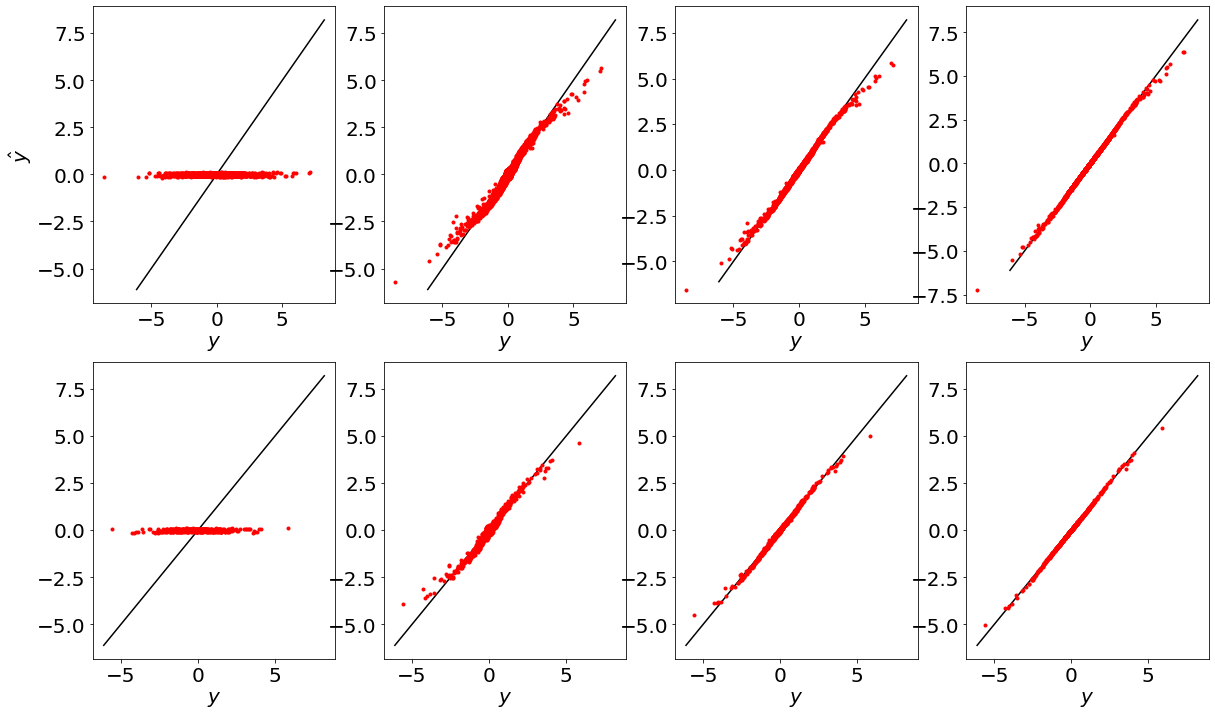

In [24]:
fig,ax=plt.subplots(2,4,figsize=[20,12])

for i in [0,1]:
    for j in [0,1,2,3]:
        ax[i,j].plot([np.min(y),np.max(y)],[np.min(y),np.max(y)],'k-')
        ax[i,j].set_xlabel('$y$')

ax[0,0].set_ylabel('$\hat y$')        

ax[0,0].plot(y_train,yhat_train_0,'r.')
ax[0,1].plot(y_train,yhat_train_1,'r.')
ax[0,2].plot(y_train,yhat_train_2,'r.')
ax[0,3].plot(y_train,yhat_train_3,'r.')

ax[1,0].plot(y_test,yhat_test_0,'r.')
ax[1,1].plot(y_test,yhat_test_1,'r.')
ax[1,2].plot(y_test,yhat_test_2,'r.')
ax[1,3].plot(y_test,yhat_test_3,'r.')




In [25]:
mlp_3.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': [126],
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 5000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [26]:
mlp_1.intercepts_

[array([ 0.90196902, -0.79492916,  0.62385082,  1.29861309,  1.51917621]),
 array([-0.70604129])]

In [ ]:
mlp_1.coefs_

In [ ]:
mlp_1.n_features_in_

In [ ]:
import numpy as np
x=np.linspace(-20,20,100)
y=np.sinc(x)
plt.plot(x,y)

In [ ]:
def norm(x):
    return (x-np.mean(x))/np.std(x)


n_samples=100000
x=stats.uniform.rvs(loc=-5,scale=10,size=n_samples)
y=np.sin(x*2)
X=x.reshape(-1,1)
plt.plot(X,y,'.')

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[64,64,64],max_iter=5000)
mlp   =model.fit(X,y)
yhat  =model.predict(X)


In [ ]:
x1=np.linspace(-5,5,200).reshape(-1,1)
x2=np.linspace(-7,7,1000).reshape(-1,1)
y1=model.predict(x1)
y2=model.predict(x2)

In [ ]:
fig,ax=plt.subplots(1,figsize=[12,6])
plt.plot(x,y,'ok',label='training data')
plt.plot(x2,y2,'r-',linewidth=3,label='Neural Net')    
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()